In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# Sử dụng mô hình Regession Imputation để dự đoán và điền giá trị thiếu

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Đọc file
df = pd.read_csv("/content/drive/MyDrive/DiabetesDetectionOptimize/diabetes.csv")

# Các cột có khả năng bị missing value (giá trị 0)
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Thay giá trị 0 bằng Regression Imputation
df_reg = df.copy()

for col in columns_with_zeros:
    non_zero_data = df_reg[df_reg[col] != 0]
    zero_data = df_reg[df_reg[col] == 0]

    if not zero_data.empty:
        model = LinearRegression()
        X_train = non_zero_data.drop(columns=columns_with_zeros)
        y_train = non_zero_data[col]

        X_missing = zero_data.drop(columns=columns_with_zeros)

        model.fit(X_train, y_train)
        df_reg.loc[df_reg[col] == 0, col] = model.predict(X_missing)

# Kiểm tra lại xem còn giá trị 0 không
zero_counts_after = (df_reg[columns_with_zeros] == 0).sum()

# Thống kê lại dataset sau khi thay thế
stats_after = df_reg.describe()

print("Số lượng giá trị 0 sau khi xử lý:")
print(zero_counts_after)
print("\nThống kê dataset sau khi thay thế:")
print(stats_after)

Số lượng giá trị 0 sau khi xử lý:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

Thống kê dataset sau khi thay thế:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.682815      72.384034      29.325383  159.000477   
std       3.369578   30.469813      12.117227       8.931387   90.642091   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  109.682977   
50%       3.000000  117.000000      72.000000      29.000000  140.000000   
75%       6.000000  141.000000      80.000000      33.382629  194.545231   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000

<ipython-input-17-e6abd118d1ab>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[106.14475219 106.34799435 107.28064901 141.25912781 144.36973693]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_reg.loc[df_reg[col] == 0, col] = model.predict(X_missing)
<ipython-input-17-e6abd118d1ab>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[71.18063521 73.96038972 69.1859825  67.74720103 71.59487208 68.23764019
 68.5308755  76.72831755 73.22766813 71.76245886 70.67914251 72.44169889
 72.28629267 76.25058514 73.95085348 68.5687997  78.16394364 68.79685006
 68.53619125 72.56709601 82.76850181 76.16808074 72.78318959 68.27670641
 69.79568059 71.02827996 71.07504803 68.71751171 70.40293065 75.11119842
 71.105707   70.71674518 67.88735877 73.82892703 73.87441035]' has dtype incompatible w

In [18]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Chọn các cột cần chuẩn hóa
features_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Áp dụng RobustScaler để chuẩn hóa dữ liệu
scaler = RobustScaler().fit(df_reg[features_to_scale])
df_reg[features_to_scale] = scaler.transform(df_reg[features_to_scale])

# Hiển thị 5 dòng đầu và 5 dòng cuối
pd.concat([df_reg.head(), df_reg.tail()])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.751515,0.000,0.715766,1.118010,0.159341,0.665359,1.235294,1
1,-0.4,-0.775758,-0.375,0.000000,0.029216,-0.609890,-0.056209,0.117647,0
2,1.0,1.600000,-0.500,0.395508,0.484973,-0.972527,0.783007,0.176471,1
3,-0.4,-0.678788,-0.375,-0.715766,-0.542055,-0.445055,-0.537255,-0.470588,0
4,-0.6,0.484848,-2.000,0.715766,0.329946,1.203297,5.007843,0.235294,1
763,1.4,-0.387879,0.250,2.266592,0.471352,0.082418,-0.526797,2.000000,0
764,-0.2,0.121212,-0.125,-0.238589,-0.148016,0.510989,-0.084967,-0.117647,0
765,0.4,0.096970,0.000,-0.715766,-0.329946,-0.653846,-0.333333,0.058824,0
766,-0.4,0.218182,-0.750,0.598157,1.238673,-0.225275,-0.061438,1.058824,1
767,-0.4,-0.581818,-0.125,0.238589,-0.216595,-0.192308,-0.150327,-0.352941,0


In [19]:
# Phân tách nhãn mục tiêu (y) và đặc trưng (X)
y = df_reg["Outcome"]  # Nhãn mục tiêu

# Chọn tất cả các cột trừ Outcome làm đặc trưng
X = df_reg.drop(columns=["Outcome"])

# Use SKLEARN for the split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [20]:
# Import the imbalance Learn module
from imblearn.pipeline import make_pipeline ## Create a Pipeline using the provided estimators .
from imblearn.under_sampling import NearMiss  ## perform Under-sampling  based on NearMiss methods.
from imblearn.over_sampling import SMOTE  ## PerformOver-sampling class that uses SMOTE.
# import the metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
import numpy as np

# Initialize lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop 10 times
for i in range(10):
    # Create and train the model
    rfc = RandomForestClassifier(random_state=i)  # Different random state for each iteration
    rfc.fit(X_train, y_train)

    # Make predictions
    y_pred = rfc.predict(X_test)

    # Calculate and store metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

    # Print metrics for each iteration
    print(f"Iteration {i+1}:")
    print(f"  Accuracy: {accuracies[-1]:.4f}")
    print(f"  Precision: {precisions[-1]:.4f}")
    print(f"  Recall: {recalls[-1]:.4f}")
    print(f"  F1 Score: {f1_scores[-1]:.4f}")
    print("-" * 30)

# Calculate average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

# Print average metrics
print("\nAverage metrics over 10 iterations:")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")

Iteration 1:
  Accuracy: 0.8117
  Precision: 0.7167
  Recall: 0.7818
  F1 Score: 0.7478
------------------------------
Iteration 2:
  Accuracy: 0.7922
  Precision: 0.6949
  Recall: 0.7455
  F1 Score: 0.7193
------------------------------
Iteration 3:
  Accuracy: 0.8377
  Precision: 0.7586
  Recall: 0.8000
  F1 Score: 0.7788
------------------------------
Iteration 4:
  Accuracy: 0.8117
  Precision: 0.7167
  Recall: 0.7818
  F1 Score: 0.7478
------------------------------
Iteration 5:
  Accuracy: 0.7922
  Precision: 0.6949
  Recall: 0.7455
  F1 Score: 0.7193
------------------------------
Iteration 6:
  Accuracy: 0.8312
  Precision: 0.7458
  Recall: 0.8000
  F1 Score: 0.7719
------------------------------
Iteration 7:
  Accuracy: 0.8312
  Precision: 0.7458
  Recall: 0.8000
  F1 Score: 0.7719
------------------------------
Iteration 8:
  Accuracy: 0.8247
  Precision: 0.7414
  Recall: 0.7818
  F1 Score: 0.7611
------------------------------
Iteration 9:
  Accuracy: 0.8506
  Precision: 0.7

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [ ]:
print(best_params)
# {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

{'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


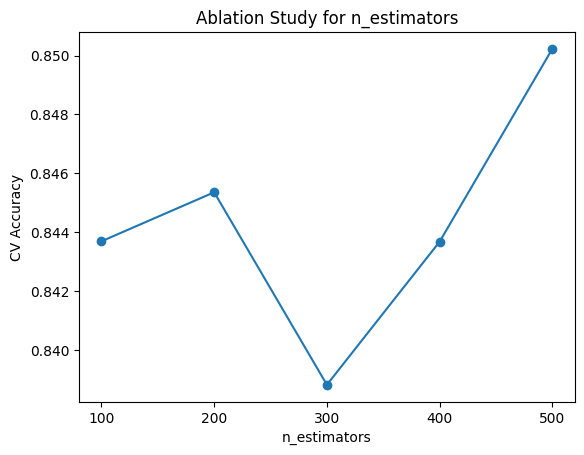

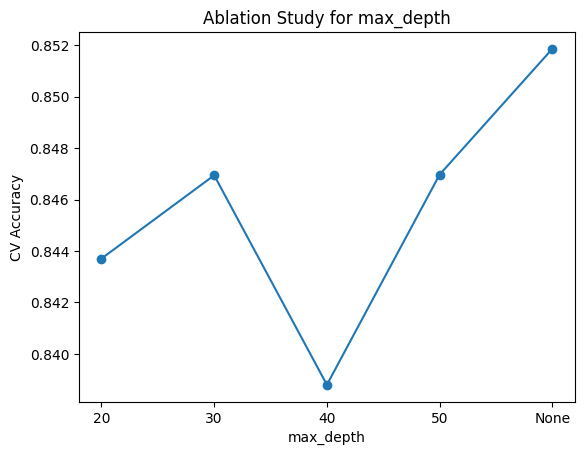

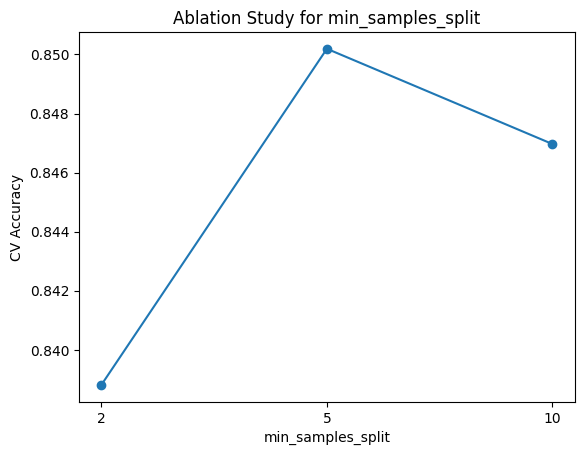

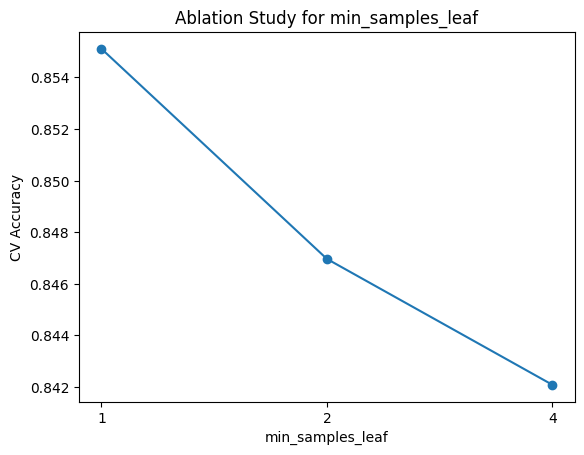

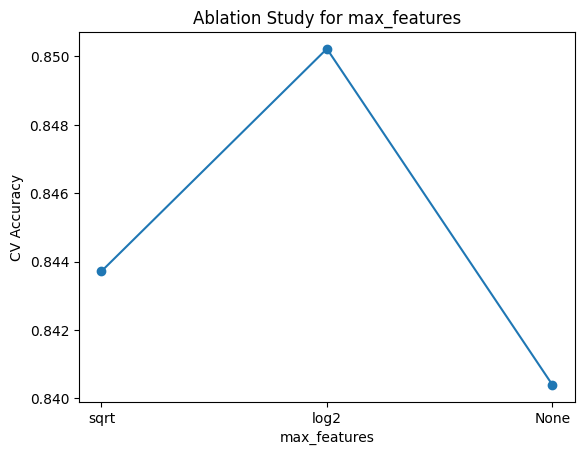

In [16]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Tham số tối ưu từ GridSearch
best_params = {
    'max_depth': 40,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 200
}

# Danh sách các tham số để ablation
param_ranges = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Hàm làm ablation study
def ablation_study(param_name, param_values):
    scores = []
    for value in param_values:
        params = best_params.copy()
        params[param_name] = value
        clf = RandomForestClassifier(**params)
        score = np.mean(cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy'))
        scores.append(score)

    plt.plot([str(v) for v in param_values], scores, marker='o')
    plt.xlabel(param_name)
    plt.ylabel('CV Accuracy')
    plt.title(f'Ablation Study for {param_name}')
    plt.show()

# Thực hiện ablation cho từng tham số
for param_name, param_values in param_ranges.items():
    ablation_study(param_name, param_values)

In [23]:
import numpy as np

# Initialize lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop 10 times
for i in range(10):
    # Create and train the model
    rfc = RandomForestClassifier(random_state=i, max_depth=40, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=200)  # Different random state for each iteration
    rfc.fit(X_train, y_train)

    # Make predictions
    y_pred = rfc.predict(X_test)

    # Calculate and store metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

    # Print metrics for each iteration
    print(f"Iteration {i+1}:")
    print(f"  Accuracy: {accuracies[-1]:.4f}")
    print(f"  Precision: {precisions[-1]:.4f}")
    print(f"  Recall: {recalls[-1]:.4f}")
    print(f"  F1 Score: {f1_scores[-1]:.4f}")
    print("-" * 30)

# Calculate average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

# Print average metrics
print("\nAverage metrics over 10 iterations:")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")

Iteration 1:
  Accuracy: 0.8247
  Precision: 0.7333
  Recall: 0.8000
  F1 Score: 0.7652
------------------------------
Iteration 2:
  Accuracy: 0.8117
  Precision: 0.7167
  Recall: 0.7818
  F1 Score: 0.7478
------------------------------
Iteration 3:
  Accuracy: 0.8312
  Precision: 0.7458
  Recall: 0.8000
  F1 Score: 0.7719
------------------------------
Iteration 4:
  Accuracy: 0.8247
  Precision: 0.7333
  Recall: 0.8000
  F1 Score: 0.7652
------------------------------
Iteration 5:
  Accuracy: 0.7987
  Precision: 0.7000
  Recall: 0.7636
  F1 Score: 0.7304
------------------------------
Iteration 6:
  Accuracy: 0.8247
  Precision: 0.7333
  Recall: 0.8000
  F1 Score: 0.7652
------------------------------
Iteration 7:
  Accuracy: 0.8117
  Precision: 0.7167
  Recall: 0.7818
  F1 Score: 0.7478
------------------------------
Iteration 8:
  Accuracy: 0.8377
  Precision: 0.7586
  Recall: 0.8000
  F1 Score: 0.7788
------------------------------
Iteration 9:
  Accuracy: 0.8247
  Precision: 0.7

In [24]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tạo ensemble model với các tham số tối ưu hơn
estimators = [
    ('rf', RandomForestClassifier(random_state=42, max_depth=25, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=500, class_weight='balanced')),
    ('gb', GradientBoostingClassifier(n_estimators=500, learning_rate=0.03, max_depth=4, subsample=0.9, min_samples_split=10)),
    ('svc', SVC(probability=True, class_weight='balanced', C=2)),
    ('gnb', GaussianNB()),
    ('lr', LogisticRegression(max_iter=4000, class_weight='balanced'))
]

# Sử dụng trọng số để ưu tiên mô hình hiệu quả hơn
voting_clf = VotingClassifier(estimators=estimators, voting='soft', weights=[3, 4, 5, 1, 5])

# Đánh giá bằng cross-validation
cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {np.mean(cv_scores):.4f}")

# Huấn luyện và đánh giá cuối cùng
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

# Tính toán và hiển thị các chỉ số
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Final Accuracy: {accuracy:.4f}")
print(f"Final Precision: {precision:.4f}")
print(f"Final Recall: {recall:.4f}")
print(f"Final F1 Score: {f1:.4f}")

Cross-validated accuracy: 0.8518
Final Accuracy: 0.8377
Final Precision: 0.7344
Final Recall: 0.8545
Final F1 Score: 0.7899


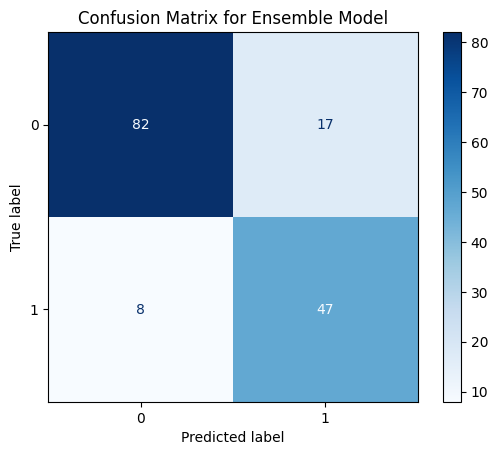

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Ensemble Model")
plt.show()